# <center> <font style="color:rgb(100,109,254)"> Histogram BackProjection</font>  <center>


In [112]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


It is basically a image segmentation technique, used to find object of interest, It is used with object tracking algorithms like meanshift and camshift which we will see later. Now what you do is you feed in the histogram of the desired object in the backproject function and using that histogram it will output a single channel mask in which each pixel corresponds to the probability of that pixel belonging to the target object. So the more white the pixel more the chances it belongs to our target Object, Now what we will do now is segment out the grass from the below image and leave the ball alone.

**Note:** When calculating the target histogram its much better to calculate the histogram of color image, because with color you get a lot more information then with single intensity values in grayscale.

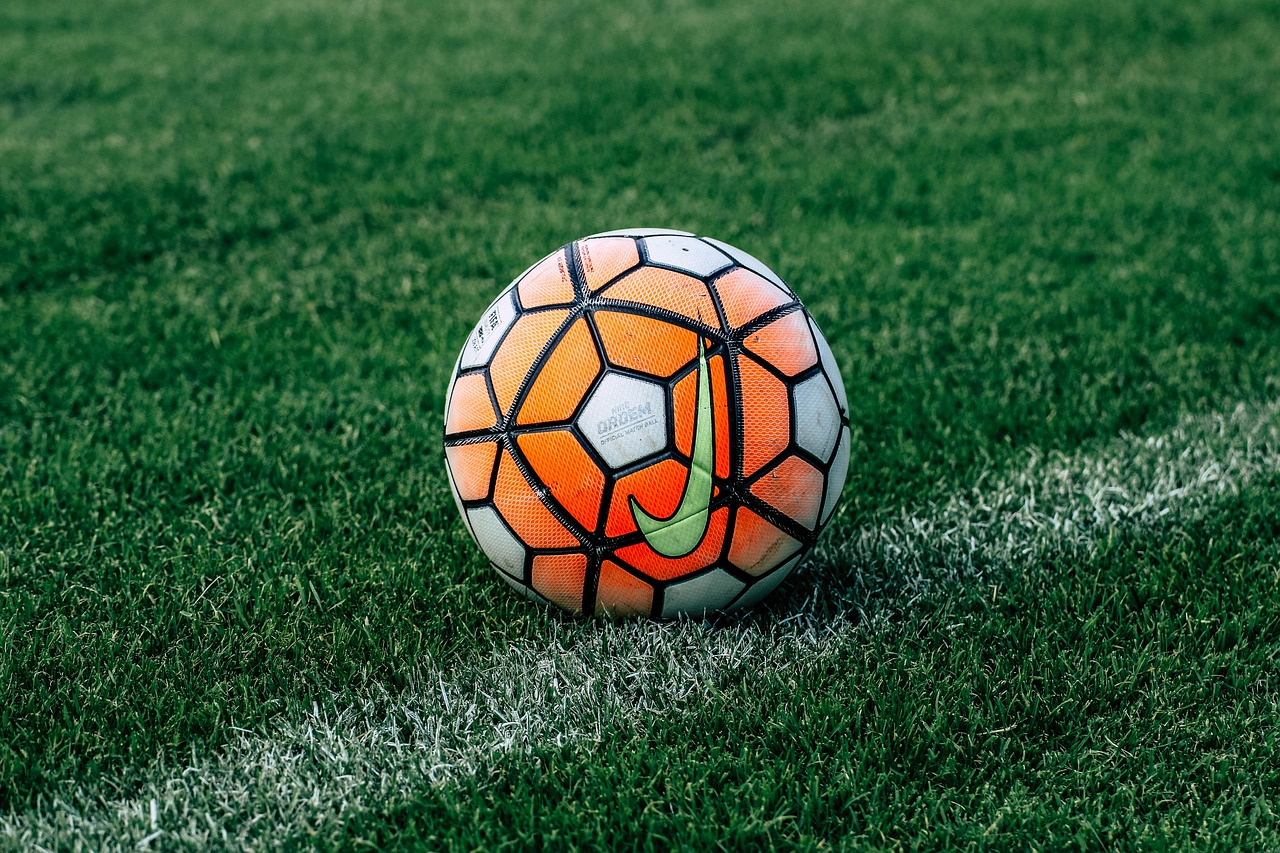

For this we will pass in the histogram of a patch of grass, which the user can select using `cv2.selectROI()`

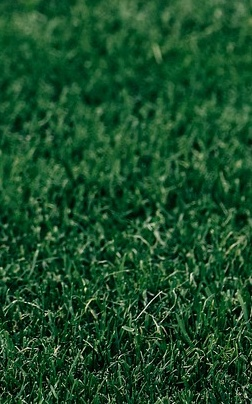

Here's the function for histogram backprojection

[```dst = cv.calcBackProject(images, channels, hist, ranges)```](https://docs.opencv.org/4.2.0/d6/dc7/group__imgproc__hist.html#ga3a0af640716b456c3d14af8aee12e3ca)

- **`images`**	Source arrays. They all should have the same depth, CV_8U, CV_16U or CV_32F , and the same size. Each of them can have an arbitrary number of channels.
nimages	Number of source images.
- **`channels`**	The list of channels used to compute the back projection. The number of channels must match the histogram dimensionality. The first array channels are numerated from 0 to images[0].channels()-1 , the second array channels are counted from images[0].channels() to images[0].channels() + images[1].channels()-1, and so on.
- **`hist`**	Input histogram that can be dense or sparse.
backProject	Destination back projection array that is a single-channel array of the same size and depth as images[0] .
- **`ranges`**	Array of arrays of the histogram bin boundaries in each dimension. See calcHist .

## <font style="color:rgb(134,19,348)">Back Projection In OpenCV</font>

In [113]:
original_image = cv2.imread("media/M4/ballfield2.jpg")
r = cv2.selectROI('mywin',original_image)   # r gives cols, rows, width and height in this order           
roi =  original_image[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]
cv2.destroyAllWindows()    

Now, since the brightness of object may change and we don't want it to effect our calculations, we will convert the image to HSV and only calculate the histogram of hue and saturation

In [114]:
hsv_original = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)
hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
hue, saturation, value = cv2.split(hsv_roi)

roi_hist = cv2.calcHist([hsv_roi], [0, 1], None, [180, 256], [0, 180, 0, 256])

Now we will get our Probability mask through backprojection, the more white the pixel the more sure it is that its grass.

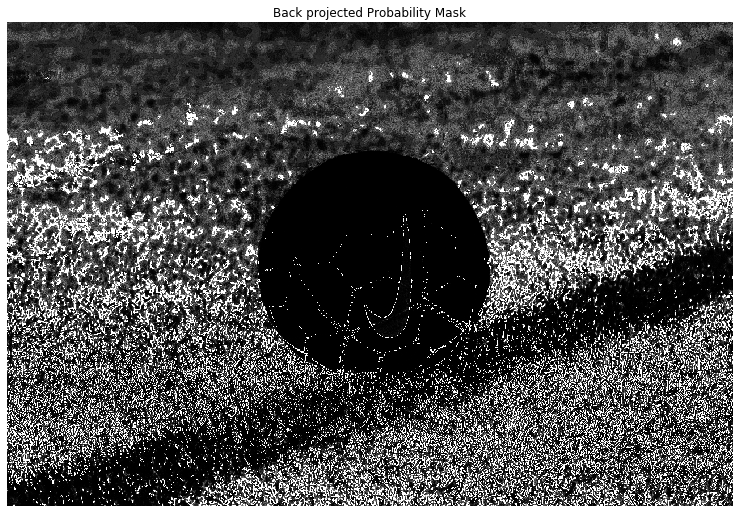

In [115]:
mask = cv2.calcBackProject([hsv_original], [0, 1], roi_hist, [0, 180, 0, 256], 1)
plt.figure(figsize=[13,13])
plt.imshow(mask,cmap = 'gray');plt.title("Back projected Probability Mask");plt.axis('off');

Now we will make an eliptical Structuring element (Eliptical kernel) go over the image to filter out the unnecessary noise, here you can try different structres and kernel sizes in `cv2.getStructuringElement()` or you can also define your own custom shapes too.

In [116]:
# Filtering remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
print(kernel)

[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


Using `cv2.filter2D` we will now convolve the kernel over the image

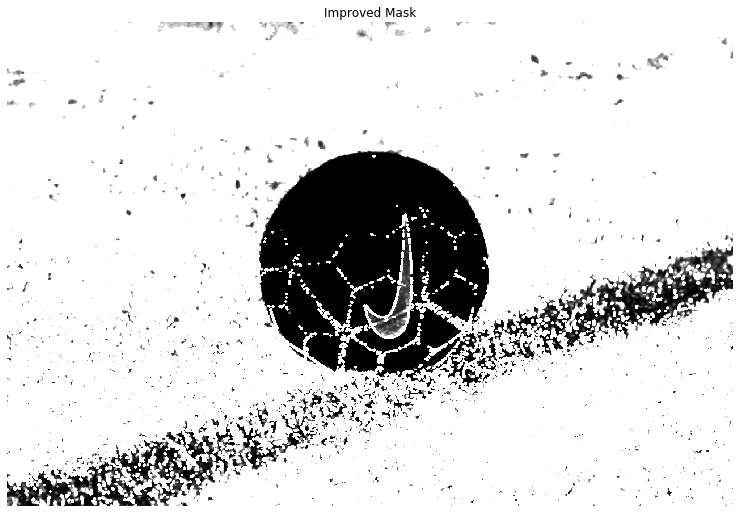

In [117]:
imp_mask = cv2.filter2D(mask, -1, kernel)
plt.figure(figsize=[13,13])
plt.imshow(imp_mask,cmap = 'gray');plt.title("Improved Mask");plt.axis('off');

Now lets threshold the above grayscale image to get a binary mask, here the value of threshold you set is very important as the higher threshold will make sure that you get the object you desire only but you will possibly loose parts of object and vice versa

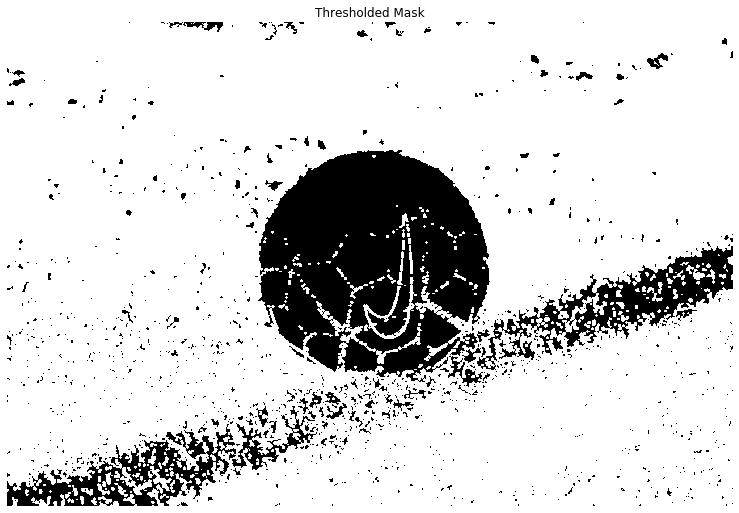

In [118]:
_, thresh_mask = cv2.threshold(imp_mask, 200, 255, cv2.THRESH_BINARY)
plt.figure(figsize=[13,13])
plt.imshow(thresh_mask,cmap = 'gray');plt.title("Thresholded Mask");plt.axis('off');

Now finally we use the And function to show only the parts of the image that contains our target object i.e grass in this case.

**Note:** We are merging the thresh_mask three times so that it matches the channel size of the original_image since the `cv2.bitwise_and()` requires that you have both images of same rows,cols,channels.

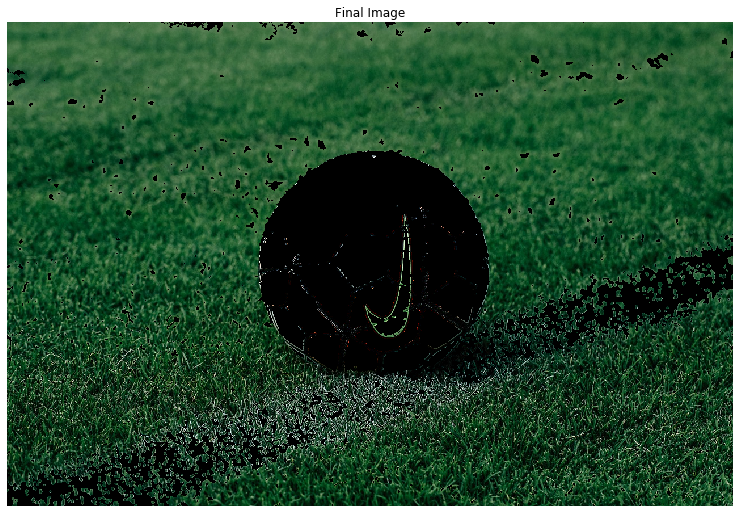

In [119]:
final_mask = cv2.merge((thresh_mask, thresh_mask, thresh_mask))
result = cv2.bitwise_and(original_image, final_mask)

plt.figure(figsize=[13,13])
plt.imshow(result[...,::-1]);plt.title("Final Image");plt.axis('off');

**Note**:  You can even improve the above results if you apply morphological operations like erosion, dilation etc on the thresholded mask

### <font style="color:rgb(34,169,134)"> Assignment: Improved Back projection on Custom Image </font>
**Your Task is to use histogram backprojection to capture some object but with a different image, it does'nt have to be grass but any other thing, you should also use morphological operations to improve the final result. All the code should be on a single cell below**

In [ ]:
## ADD CODE HERE


